<a href="https://colab.research.google.com/github/mashuai191/machine_learning/blob/master/computer_vision/matchShape.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import cv2
import os


os.listdir('gdrive/My Drive/App/machine_learning/cv/shanghaidianqi_line5/test')
BASE_DIR = 'gdrive/My Drive/App/machine_learning/cv/shanghaidianqi_line5/test'

In [46]:
for root, dirs, files in os.walk(os.path.join(BASE_DIR, "dataset"), topdown=False):
   for name in files:
      print(os.path.join(root, name))
      #print (name)
   for name in dirs:
      print(os.path.join(root, name))

gdrive/My Drive/App/machine_learning/cv/shanghaidianqi_line5/test/dataset/21.png
gdrive/My Drive/App/machine_learning/cv/shanghaidianqi_line5/test/dataset/33.png
gdrive/My Drive/App/machine_learning/cv/shanghaidianqi_line5/test/dataset/32.png
gdrive/My Drive/App/machine_learning/cv/shanghaidianqi_line5/test/dataset/31.png
gdrive/My Drive/App/machine_learning/cv/shanghaidianqi_line5/test/dataset/27.png
gdrive/My Drive/App/machine_learning/cv/shanghaidianqi_line5/test/dataset/25.png
gdrive/My Drive/App/machine_learning/cv/shanghaidianqi_line5/test/dataset/24.png
gdrive/My Drive/App/machine_learning/cv/shanghaidianqi_line5/test/dataset/26.png
gdrive/My Drive/App/machine_learning/cv/shanghaidianqi_line5/test/dataset/22.png
gdrive/My Drive/App/machine_learning/cv/shanghaidianqi_line5/test/dataset/23.png
gdrive/My Drive/App/machine_learning/cv/shanghaidianqi_line5/test/dataset/34.png
gdrive/My Drive/App/machine_learning/cv/shanghaidianqi_line5/test/dataset/11.png
gdrive/My Drive/App/machine_

In [47]:
import pandas as pd
files = sorted(files)
#print (files)
df_ = pd.DataFrame(index=files, columns=files)
df_

,11.png,12.png,13.png,14.png,15.png,16.png,17.png,21.png,22.png,23.png,24.png,25.png,26.png,27.png,31.png,32.png,33.png,34.png,35.png,36.png,37.png
11.png,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12.png,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13.png,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14.png,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15.png,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16.png,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17.png,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21.png,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22.png,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23.png,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
import skimage
print (skimage.__version__)
from skimage.measure import compare_ssim as ssim


#df_sim = pd.DataFrame(index=files, columns=)
for index, row in df_.iterrows():
    print(index)
    im1 = cv2.imread(os.path.join(root, index),cv2.IMREAD_GRAYSCALE)
    _,im1 = cv2.threshold(im1, 128, 255, cv2.THRESH_BINARY)

    for col_idx, col_val in row.items():
        #print (col_idx)
        im2 = cv2.imread(os.path.join(root, col_idx),cv2.IMREAD_GRAYSCALE)
        _,im2 = cv2.threshold(im2, 128, 255, cv2.THRESH_BINARY)
        #df_.loc[index, col_idx] = cv2.matchShapes(im1,im2,cv2.CONTOURS_MATCH_I1,0)
        df_.loc[index, col_idx] = ssim(im1, im2)

df_

0.15.0
11.png
12.png
13.png
14.png
15.png
16.png
17.png
21.png
22.png
23.png
24.png
25.png
26.png
27.png
31.png
32.png
33.png
34.png
35.png
36.png
37.png


,11.png,12.png,13.png,14.png,15.png,16.png,17.png,21.png,22.png,23.png,24.png,25.png,26.png,27.png,31.png,32.png,33.png,34.png,35.png,36.png,37.png
11.png,1,0.978063,0.976522,0.960338,0.957335,0.935072,0.972258,0.996009,0.978125,0.969051,0.955109,0.959122,0.938571,0.948897,0.942497,0.927464,0.927169,0.927371,0.926904,0.927005,0.927169
12.png,0.978063,1,0.973474,0.954431,0.952065,0.93353,0.962715,0.978253,0.994303,0.967283,0.950665,0.95629,0.937055,0.939729,0.940877,0.927705,0.927409,0.927626,0.927144,0.927245,0.927409
13.png,0.976522,0.973474,1,0.961488,0.958443,0.934782,0.975198,0.977474,0.972146,0.987964,0.955562,0.963111,0.938105,0.951266,0.94481,0.927869,0.927573,0.927775,0.927308,0.927409,0.927573
14.png,0.960338,0.954431,0.961488,1,0.984321,0.944332,0.974837,0.959886,0.95609,0.961347,0.978608,0.977982,0.946604,0.951096,0.950372,0.927409,0.927113,0.927315,0.926848,0.926949,0.927113
15.png,0.957335,0.952065,0.958443,0.984321,1,0.946763,0.968577,0.957372,0.954368,0.95983,0.972094,0.986374,0.948681,0.945272,0.951391,0.927611,0.927315,0.927517,0.92705,0.927151,0.927315
16.png,0.935072,0.93353,0.934782,0.944332,0.946763,1,0.938883,0.937216,0.937448,0.941511,0.956192,0.951658,0.995245,0.91757,0.940511,0.927144,0.926848,0.92705,0.926583,0.926684,0.926848
17.png,0.972258,0.962715,0.975198,0.974837,0.968577,0.938883,1,0.971501,0.964288,0.968818,0.964218,0.967454,0.941803,0.97509,0.947626,0.927245,0.926949,0.927151,0.926684,0.926785,0.926949
21.png,0.996009,0.978253,0.977474,0.959886,0.957372,0.937216,0.971501,1,0.981815,0.970004,0.955738,0.962812,0.940716,0.948141,0.946186,0.931154,0.930858,0.931061,0.930593,0.930695,0.930858
22.png,0.978125,0.994303,0.972146,0.95609,0.954368,0.937448,0.964288,0.981815,1,0.965956,0.953585,0.961688,0.940973,0.941302,0.946275,0.933103,0.932807,0.933024,0.932542,0.932643,0.932807
23.png,0.969051,0.967283,0.987964,0.961347,0.95983,0.941511,0.968818,0.970004,0.965956,1,0.96321,0.964498,0.944718,0.944738,0.950332,0.934404,0.934108,0.934311,0.933843,0.933945,0.934108


In [0]:
df_= df_.astype(float)
#print (df_.dtypes)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5]),
 <a list of 21 Text xticklabel objects>)

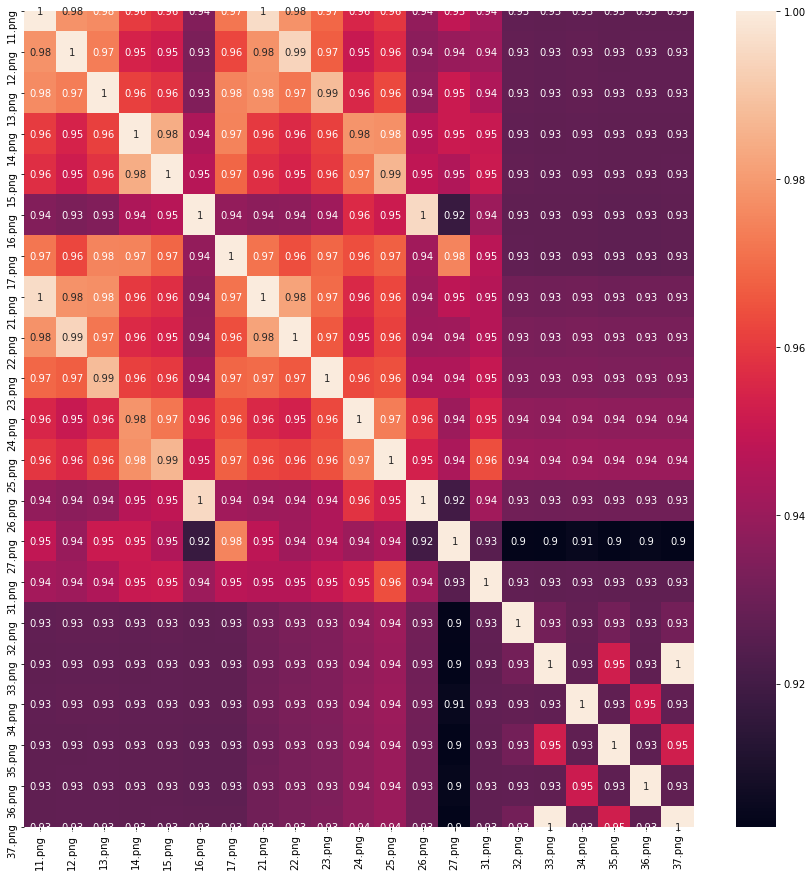

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
fig, ax = plt.subplots(figsize=(15, 15)) 
sns.heatmap(df_, annot=True, ax=ax)
plt.yticks(rotation=90) 
plt.xticks(rotation=90) 



In [0]:
# Read image as grayscale image
im1 = cv2.imread(os.path.join(BASE_DIR, 'val_780_original.jpg'),cv2.IMREAD_GRAYSCALE)
im2 = cv2.imread(os.path.join(BASE_DIR, 'val_780_miss.jpg'),cv2.IMREAD_GRAYSCALE)
im3 = cv2.imread(os.path.join(BASE_DIR, 'val_780_rotate.jpg'),cv2.IMREAD_GRAYSCALE)

print (im3)

In [0]:
# Threshold image
_,im1 = cv2.threshold(im1, 128, 255, cv2.THRESH_BINARY)
_,im2 = cv2.threshold(im2, 128, 255, cv2.THRESH_BINARY)
_,im3 = cv2.threshold(im3, 128, 255, cv2.THRESH_BINARY)

In [0]:
# Calculate Moments
moments = cv2.moments(im1)
 
# Calculate Hu Moments
huMoments = cv2.HuMoments(moments)

In [0]:
print (huMoments)

In [0]:
d12 = cv2.matchShapes(im1,im2,cv2.CONTOURS_MATCH_I1,0)
d13 = cv2.matchShapes(im1,im3,cv2.CONTOURS_MATCH_I1,0)
d23 = cv2.matchShapes(im2,im3,cv2.CONTOURS_MATCH_I1,0)
print (d12)
print (d13)
print (d23)

In [0]:
d12 = cv2.matchShapes(im1,im2,cv2.CONTOURS_MATCH_I2,0)
d13 = cv2.matchShapes(im1,im3,cv2.CONTOURS_MATCH_I2,0)
d23 = cv2.matchShapes(im2,im3,cv2.CONTOURS_MATCH_I2,0)
print (d12)
print (d13)
print (d23)

In [0]:
d12 = cv2.matchShapes(im1,im2,cv2.CONTOURS_MATCH_I3,0)
d13 = cv2.matchShapes(im1,im3,cv2.CONTOURS_MATCH_I3,0)
d23 = cv2.matchShapes(im2,im3,cv2.CONTOURS_MATCH_I3,0)
print (d12)
print (d13)
print (d23)